### Задание
Нужно решить задачу регрессии. В качестве датасета возьмем данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal.  На полученных данных построить модель регрессии и дерево решений.

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

In [ ]:
data = fetch_california_housing(as_frame=True)

In [ ]:
df = data.data

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


a.Проверим данные на пропуски.

In [ ]:
df.info()# значений null нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [ ]:
df.describe() # видно что данные с выбросами.

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


Нормализуем один из признаков.

In [ ]:
from sklearn import preprocessing
pop_norm = preprocessing.normalize([df.Population])
df.Population = pop_norm.T

<ipython-input-130-8c3a6ada216e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Population = pop_norm.T


In [ ]:
df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,0.001231,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,0.009180,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,0.001896,2.802260,37.85,-122.24


Делим выборку на обучающее и тестовое подмножества. 80% данных на обучающее множество, 20% - на тестовое.

In [ ]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
X = df[['HouseAge', 'AveRooms', 'AveBedrms','Population', 'AveOccup',
       'Latitude', 'Longitude']]
y = df['MedInc']

In [ ]:
from sklearn.model_selection import train_test_split
# X is your feature data, y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучите модель регрессии на обучающем множестве.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

Для тестового множества предскажем целевую переменную и сравним с истинным значением, посчитав точность предсказания модели. 

In [ ]:
model.score(X_test, y_test)

0.557464090870184

In [ ]:
model.score(X_train, y_train) #metricks equals

0.6062705272505085

Обучим дерево решений на обучающем множестве

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
clf = DecisionTreeRegressor(max_depth=2)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

Для тестового множества предскажем целевую переменную и сравните с истинным значением, посчитав точность предсказания модели.

In [ ]:
clf.score(X_train, y_train)

0.4269483134198062

In [ ]:
clf.score(X_test, y_test) # accuracy of train and test selections are equals
# accuracy of linear regression model is better.

0.44261220323844574


Визуализируем часть дерева решений. 

[Text(0.5, 0.8333333333333334, 'AveRooms <= 5.971\nsquared_error = 3.626\nsamples = 16512\nvalue = 3.881'),
 Text(0.25, 0.5, 'AveRooms <= 4.905\nsquared_error = 1.478\nsamples = 12013\nvalue = 3.232'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.993\nsamples = 6401\nvalue = 2.763'),
 Text(0.375, 0.16666666666666666, 'squared_error = 1.494\nsamples = 5612\nvalue = 3.766'),
 Text(0.75, 0.5, 'AveBedrms <= 1.136\nsquared_error = 5.237\nsamples = 4499\nvalue = 5.613'),
 Text(0.625, 0.16666666666666666, 'squared_error = 4.442\nsamples = 3410\nvalue = 6.146'),
 Text(0.875, 0.16666666666666666, 'squared_error = 4.058\nsamples = 1089\nvalue = 3.946')]

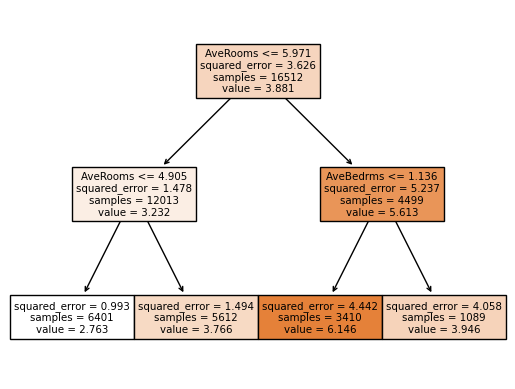

In [ ]:
from sklearn.tree import plot_tree

plot_tree(clf, feature_names = X_train.columns, filled = True)

Оптимизируем глубину дерева (max_depth).

In [ ]:

for i in range(2,10):
  clf = DecisionTreeRegressor(max_depth=i)
  clf.fit(X_train, y_train)
  print (f'Depth:{i}, TrainAcc: {clf.score(X_train, y_train)}, TestAcc:{clf.score(X_test, y_test)} ')

Depth:2, TrainAcc: 0.4269483134198062, TestAcc:0.44261220323844563 
Depth:3, TrainAcc: 0.542168503727346, TestAcc:0.5469024101240945 
Depth:4, TrainAcc: 0.6009930788981603, TestAcc:0.608047551915216 
Depth:5, TrainAcc: 0.6478393605976294, TestAcc:0.6403141374180699 
Depth:6, TrainAcc: 0.6886964194873796, TestAcc:0.6574261870701097 
Depth:7, TrainAcc: 0.7235088447395418, TestAcc:0.6694115381051369 
Depth:8, TrainAcc: 0.7557513318548312, TestAcc:0.6751606216832453 
Depth:9, TrainAcc: 0.7890421436470488, TestAcc:0.6718087651191778 


In [ ]:
# optimal tree depth is 5. Difference behind train and test selection is minimal.

*Оптимизируйте ещё один параметр модели на выбор.

In [ ]:
# changing samples leaf
for i in range(2,10):
  clf = DecisionTreeRegressor(max_depth=i, min_samples_leaf =300)
  clf.fit(X_train, y_train)
  print (f'Depth:{i}, TrainAcc: {clf.score(X_train, y_train)}, TestAcc:{clf.score(X_test, y_test)} ')

Depth:2, TrainAcc: 0.4269483134198062, TestAcc:0.44261220323844563 
Depth:3, TrainAcc: 0.542168503727346, TestAcc:0.5469024101240945 
Depth:4, TrainAcc: 0.5877410725752349, TestAcc:0.5999651699452062 
Depth:5, TrainAcc: 0.6152351268475815, TestAcc:0.6215736884339552 
Depth:6, TrainAcc: 0.6331813395489722, TestAcc:0.636123959357004 
Depth:7, TrainAcc: 0.6368801246717013, TestAcc:0.6382599031880112 
Depth:8, TrainAcc: 0.63795336788623, TestAcc:0.63849578089575 
Depth:9, TrainAcc: 0.63795336788623, TestAcc:0.6384957808957499 


Вывод:
1. Линейная регрессия дает точность 55 и 60 проц на обучающей и тестовой выборках.
2. Древо решений глубиной 5 и минимальным размером листа 1 (дефолтное значение) дает наибольшую точность 64%.
3. Изменяя параметр минимального количества точек данных на лист можно улучшить производительность модели, но уменьшить точность. При размере листа 300 и глубине дерева 5 точность уменюшается до 62 %, что все-равно лучше чем у линейной регрессии.